### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement EDA techniques.

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

### 1. Import the necessary packages

In [1]:
import pandas as pd   # Pandas python library
import numpy as np    # Numpy python library  
import seaborn as sns # Seaborn python library for Visualization
import matplotlib.pyplot as plt # Pyplot python library for Visualization
sns.set(color_codes = True) # color code for seaborn graphs
# To display graph without printing object details on stdout
%matplotlib inline

pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", 50)
pd.set_option("display.precision", 5)

### 2. Read the 3 datasets into dataframes

In [2]:
'''
Reading user ratings, movie and user data from .csv file
and converting the same to Pandas dataframe
'''
# Reading user ratings data from .csv file
userRatingDataDf  = pd.read_csv('Data.csv')

# Reading movie data from .csv file
movieDataDf       = pd.read_csv('item.csv')

# User data from .csv file
userDataDf        = pd.read_csv('user.csv')

### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operation

In [3]:
# Reading info, shape, describe and number of missing values in user ratings data
print ("DataFrame information of User ratings data \n====================")
userRatingDataDf.info()   # Information about user ratings dataset
print ('Shape of user ratings data : {0}' .format(userRatingDataDf.shape)) # Shape of user ratings dataset 
print ('Describe stats of user ratings data : \n{0}' .format(userRatingDataDf.describe())) # Describe stats of user ratings dataset
print ("Number of missing data in user ratings data : {0}" .format(userRatingDataDf.isnull().sum().sum())) # Total number of missing values in user ratings dataset

# Reading info, shape, describe and number of missing values in movie data
print ("\n\nDataFrame information of movie data \n====================")
movieDataDf.info()  # Information about movies dataset
print ('Shape of movie data : {0}' .format(movieDataDf.shape))  # Shape of movies dataset 
print ('Describe stats of movie data : \n{0}' .format(movieDataDf.describe()))  # Describe stats of movies dataset
print ("Number of missing data in movie data : {0}" .format(movieDataDf.isnull().sum().sum()))  # Total number of missing values in movies dataset

# Reading info, shape, describe and number of missing values in user data
print ("\n\nDataFrame information of user data \n====================")
userDataDf.info() # Information about user dataset
print ('Shape of user data : {0}' .format(userDataDf.shape))  # Shape of user dataset 
print ('Describe stats of user data : \n{0}' .format(userDataDf.describe()))  # Describe stats of user dataset
print ("Number of missing data in user data : {0}" .format(userDataDf.isnull().sum().sum()))  # Total number of missing values in user dataset

DataFrame information of User ratings data 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
Shape of user ratings data : (100000, 4)
Describe stats of user ratings data : 
            user id      movie id        rating    timestamp
count  100000.00000  100000.00000  100000.00000  1.00000e+05
mean      462.48475     425.53013       3.52986  8.83529e+08
std       266.61442     330.79836       1.12567  5.34386e+06
min         1.00000       1.00000       1.00000  8.74725e+08
25%       254.00000     175.00000       3.00000  8.79449e+08
50%       447.00000     322.00000       4.00000  8.82827e+08
75%       682.00000     631.00000       4.00000  8.88260e+08
max    

**Observations:**
Number of missing values in all 3 data set is 0

### 4. Find the number of movies per genre using the item data

In [4]:
movieDataDfColumns = movieDataDf.iloc[:, 3:]  # Fetch columns of movie data set

for genre in movieDataDfColumns:
  # Iterate over each column of genre category and print where value is 1
  print ("Count of Movies in {0} genre category is : {1}" .format(genre, movieDataDf[movieDataDf[genre] == 1][genre].sum()))

Count of Movies in unknown genre category is : 1
Count of Movies in Action genre category is : 251
Count of Movies in Adventure genre category is : 135
Count of Movies in Animation genre category is : 42
Count of Movies in Childrens genre category is : 122
Count of Movies in Comedy genre category is : 505
Count of Movies in Crime genre category is : 109
Count of Movies in Documentary genre category is : 50
Count of Movies in Drama genre category is : 725
Count of Movies in Fantasy genre category is : 22
Count of Movies in Film-Noir genre category is : 24
Count of Movies in Horror genre category is : 92
Count of Movies in Musical genre category is : 56
Count of Movies in Mystery genre category is : 61
Count of Movies in Romance genre category is : 247
Count of Movies in Sci-Fi genre category is : 101
Count of Movies in Thriller genre category is : 251
Count of Movies in War genre category is : 71
Count of Movies in Western genre category is : 27


**Insights:**
Only 1 movie is in unknown category and most of movies lies in Drame OR Comedy category


### 5. Drop the movie where the genre is unknown

In [5]:
unknownMovieIndex = movieDataDf[movieDataDf.unknown == 1].index # Fetching row index where the genre is unknown
print("index: {0}" .format(unknownMovieIndex))  
movieDataDf.drop(unknownMovieIndex, inplace = True) # drop the row with index value captured previously

index: Int64Index([1371], dtype='int64')


**Insights:**
There is only 1 movie whose genre is unknown

### 6. Find the movies that have more than one genre

In [6]:
movieDataDf['Number_Of_Genre'] = movieDataDf.iloc[:, 3:].sum(axis = 1) # Add up all the genre values for each rows and save it new column
movieGenreDataFrame = movieDataDf[movieDataDf.Number_Of_Genre > 1] # Filtering out data for a movie whose genre is more than one
print ("Movie name and Genre dataset having more than one genre : \n {0}" .format(movieGenreDataFrame[['movie title', 'Number_Of_Genre']]))   # Data frame with more than one genre
print("Number of movies with more than one genre : {0}" .format(movieGenreDataFrame['movie title'].count()))  # Total number of movies which have more than one genres

Movie name and Genre dataset having more than one genre : 
              movie title  Number_Of_Genre
0             Toy Story                 3
1             GoldenEye                 3
3            Get Shorty                 3
4               Copycat                 3
6        Twelve Monkeys                 2
...                  ...              ...
1667  MURDER and murder                 3
1668            Tainted                 2
1671             Mirage                 2
1677          B. Monkey                 2
1678      Sliding Doors                 2

[849 rows x 2 columns]
Number of movies with more than one genre : 849


**Insights:**
Around 50% of data is having more than one genre


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation'

In [7]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


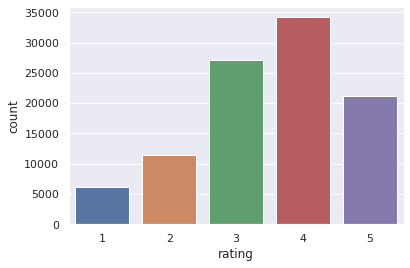

In [8]:
sns.countplot(x = 'rating', data = userRatingDataDf);  # Univariate plots of rating

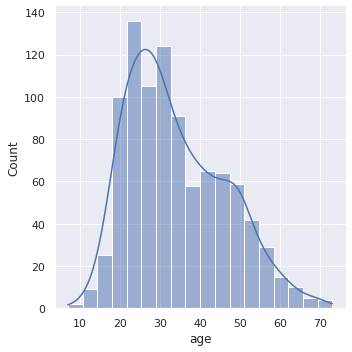

In [9]:
sns.displot(x = 'age', data = userDataDf, kde = True);  # Univariate plots of gge

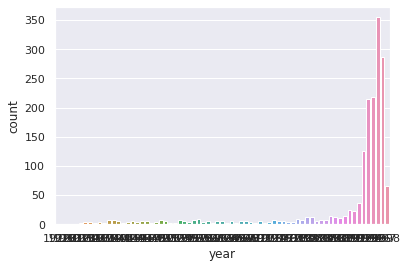

In [10]:
movieDataDf['year'] = movieDataDf['release date'].apply(lambda x : x.split('-')[2]) # Filtering out year from release year values
movieDataDf.sort_values(by = 'year', inplace = True)  # Sorting dataset by year for plotting
sns.countplot(x = 'year', data = movieDataDf); # Univariate plots of year

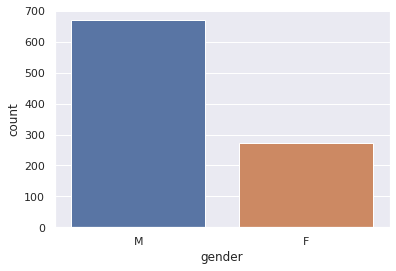

In [11]:
sns.countplot(x = 'gender', data = userDataDf); # Univariate plots of gender

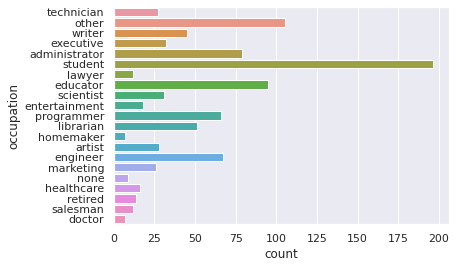

In [12]:
sns.countplot(y = 'occupation', data = userDataDf); # Univariate plots of occupation

### 8. Visualize how popularity of genres has changed over the years

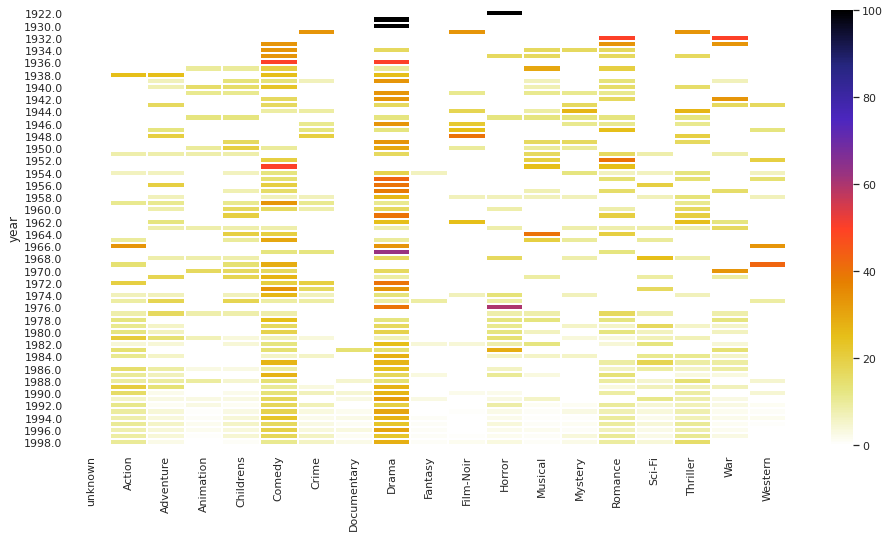

In [13]:
movieDataDf.year = movieDataDf.year.apply(lambda x : float(x))
YearGenreDF = movieDataDf.groupby('year').sum()   # Summing values by year
YearGenreDF.drop(columns = ['movie id','Number_Of_Genre'], inplace = True) # Remove unnecessary columns
YearGenreDF['total'] = YearGenreDF.sum(axis = 1)    # Summing values thourgh column axis
YearGenreDF = YearGenreDF.div(YearGenreDF.total, axis = 0) * 100  # Calculate % for each genre values
YearGenreDF.drop(columns=['total'], inplace = True)
YearGenreDF.reset_index(inplace = True) # Reset the dataframe index
YearGenreDF.set_index('year', inplace = True) # Setting year column as a index

plt.figure(figsize=(16, 8))
sns.heatmap(YearGenreDF, linewidth = 1, cmap="CMRmap_r")
plt.show()

**Insights:**

Over the years , popularity of genres is going down

### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times

In [14]:
mergedDf = pd.merge(userRatingDataDf, movieDataDf, how = 'outer', on = 'movie id')  # Merge user rating and movie data set using outer on movie id column
filteredDf = mergedDf.groupby(['movie id', 'movie title']).agg({'rating' : ['count', 'mean']})  # Calculate mean and count of rating by grouping movie id and movie title
filteredDf.reset_index(inplace = True) # Reset data frame index
filteredDf = filteredDf[filteredDf['rating']['count'] > 100]  # Filtered out the data where rating count is more than 100
filteredDf.sort_values( by = [('rating', 'mean')], inplace = True, ascending = False) # Sort the data by average value of rating
filteredDf.head(25)  # Print top 25 movies

movie id                                        movie title rating  \
                                                                 count   
406      408                                    Close Shave, A     112   
316      318                                  Schindler's List     298   
168      169                               Wrong Trousers, The     118   
481      483                                        Casablanca     243   
63        64                         Shawshank Redemption, The     283   
601      603                                       Rear Window     209   
11        12                               Usual Suspects, The     267   
49        50                                         Star Wars     583   
177      178                                      12 Angry Men     125   
133      134                                      Citizen Kane     198   
425      427                             To Kill a Mockingbird     219   
355      357                   One Flew Over the Cuckoo's Nest     264   
97        98                         Silence of the Lambs, The     390   
478      480                                North by Northwest     179   
126      127                                    Godfather, The     413   
283      285                                    Secrets & Lies     162   
270      272                                 Good Will Hunting     198   
655      657                         Manchurian Candidate, The     131   
472      474  Dr. Strangelove or: How I Learned to Stop Worr...    194   
173      174                           Raiders of the Lost Ark     420   
477      479                                           Vertigo     179   
311      313                                           Titanic     350   
509      511                                Lawrence of Arabia     173   
482      484                               Maltese Falcon, The     138   
171      172                          Empire Strikes Back, The     367   

              
        mean  
406  4.49107  
316  4.46644  
168  4.46610  
481  4.45679  
63   4.44523  
601  4.38756  
11   4.38577  
49   4.35849  
177  4.34400  
133  4.29293  
425  4.29224  
355  4.29167  
97   4.28974  
478  4.28492  
126  4.28329  
283  4.26543  
270  4.26263  
655  4.25954  
472  4.25258  
173  4.25238  
477  4.25140  
311  4.24571  
509  4.23121  
482  4.21014  
171  4.20436

### 10. Check for the validity of the below statements with respect to the data provided

In [15]:
mergedDf = pd.merge(userRatingDataDf, movieDataDf, how = 'outer', on = 'movie id')  # Merge user rating and movie data set using outer on movie id column
mergedData = pd.merge(mergedDf, userDataDf, how = 'outer', on = 'user id')  # Merge all the data set using outer on user id column

# Calculate total ratings received by women and men
womenRatings = mergedData.groupby('gender')['rating'].count()['F']
menRatings = mergedData.groupby('gender')['rating'].count()['M']

# Calculate total ratings received by women and men for drama genre
womenDramaRatings = mergedData[mergedData.Drama == 1].groupby('gender')['rating'].count()['F']
menDramaRatings = mergedData[mergedData.Drama == 1].groupby('gender')['rating'].count()['M']

# Calculate percentage of men watch drame genre
menPercent = round(((womenDramaRatings/womenRatings) * 100), 2)
womenPercent = round(((menDramaRatings/menRatings) * 100), 2)
print("Men watch {0} Percentage of drama and women is {1}" .format( menPercent, womenPercent))

Men watch 42.77 Percentage of drama and women is 38.9


In [16]:
# Calculate total ratings received by women and men for Sci-Fi genre
womenDramaRatings = mergedData[mergedData['Sci-Fi'] == 1].groupby('gender')['rating'].count()['F']
menDramaRatings = mergedData[mergedData['Sci-Fi'] == 1].groupby('gender')['rating'].count()['M']

# Calculate percentage of men watch Sci-Fi genre
menPercent = round(((womenDramaRatings/womenRatings) * 100), 2)
womenPercent = round(((menDramaRatings/menRatings) * 100), 2)
print("Men watch {0} Percentage of Sci-Fi and women is {1}" .format( menPercent, womenPercent))

Men watch 10.21 Percentage of Sci-Fi and women is 13.6


In [17]:
# Calculate total ratings received by women and men for Romance genre
womenDramaRatings = mergedData[mergedData.Romance == 1].groupby('gender')['rating'].count()['F']
menDramaRatings = mergedData[mergedData.Romance == 1].groupby('gender')['rating'].count()['M']

# Calculate percentage of men watch Romance genre
menPercent = round(((womenDramaRatings/womenRatings) * 100), 2)
womenPercent = round(((menDramaRatings/menRatings) * 100), 2)
print("Men watch {0} Percentage of Romance and women is {1}" .format( menPercent, womenPercent))

Men watch 22.76 Percentage of Romance and women is 18.32


**Conclusion:**

Men watch more drama than women    ---> TRUE

Women watch more Sci-Fi than men   ---> TRUE

Men watch more Romance than women  ---> TRUE


In [18]:
mergedDf = pd.merge(userRatingDataDf, movieDataDf, how = 'inner', on = 'movie id')  # Merge user rating and movie data set using outer on movie id column
mergedData = pd.merge(mergedDf, userDataDf, how = 'inner', on = 'user id')  # Merge all the data set using outer on user id column

print(mergedData.columns)

Index(['user id', 'movie id', 'rating', 'timestamp', 'movie title',
       'release date', 'unknown', 'Action', 'Adventure', 'Animation',
       'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western', 'Number_Of_Genre', 'year', 'age',
       'gender', 'occupation', 'zip code'],
      dtype='object')


In [19]:
genrebasedOnGender = mergedData.groupby('gender').sum().loc[:,'unknown':'Western']

In [20]:
print(genrebasedOnGender)

        unknown  Action  Adventure  Animation  Childrens  Comedy  Crime  \
gender                                                                    
F             0    5442       3141        995       2232    8068   1794   
M             0   20147      10612       2610       4950   21764   6261   

        Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  \
gender                                                                     
F               187  11008      363        385    1197     1442     1314   
M               571  28887      989       1348    4120     3512     3931   

        Romance  Sci-Fi  Thriller   War  Western  
gender                                            
F          5858    2629      5086  2189      371  
M         13603   10101     16786  7209     1483  


In [21]:
genrebasedOnGender['total'] = mergedData.gender.value_counts()
genrebasedOnGender

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,,
F,0,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,25738
M,0,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,74252


In [22]:
genrebasedOnGender = genrebasedOnGender.div(genrebasedOnGender.total, axis = 0) * 100
genrebasedOnGender

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,,
F,0.0,21.14383,12.20375,3.86588,8.67200,31.34665,6.97024,0.72655,42.76945,1.41037,1.49584,4.65071,5.60261,5.10529,22.76012,10.21447,19.76067,8.50493,1.44145,100.0
M,0.0,27.13328,14.29187,3.51506,6.66649,29.31099,8.43210,0.76900,38.90400,1.33195,1.81544,5.54867,4.72984,5.29413,18.32005,13.60367,22.60680,9.70883,1.99725,100.0
